# Different prediction methods to predict HP

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel ('C:/Users/charg/Desktop/Coding/pokemon_project/pokedex.xlsx')
df.head()   #Checking import

,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
0,Bulbasaur,Grass Poison,45,49,49,65,65,45
1,Ivysaur,Grass Poison,60,62,63,80,80,60
2,Venusaur,Grass Poison,80,82,83,100,100,80
3,Venusaur Mega Venusaur,Grass Poison,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65


## First lets visualize some relationships using data visualization tools

<AxesSubplot:xlabel='Defense', ylabel='HP'>

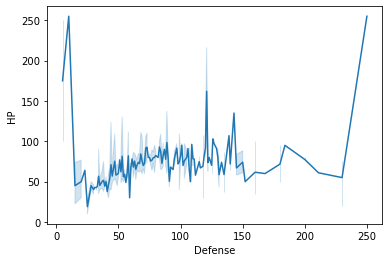

In [3]:
sns.lineplot(data = df, x=df['Defense'], y=df['HP'])     #not a good visualization

<AxesSubplot:xlabel='Defense', ylabel='HP'>

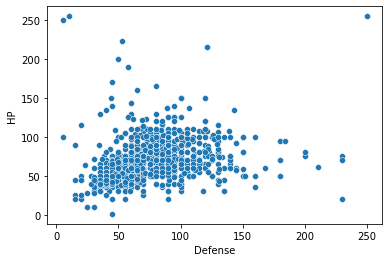

In [19]:
sns.scatterplot(data = df, x=df['Defense'], y=df['HP'])     #I am guessing there will be a correlation between HP and defense
                                                            #we can see there isnt really a conclusion to draw here

<AxesSubplot:xlabel='Sp_Def', ylabel='HP'>

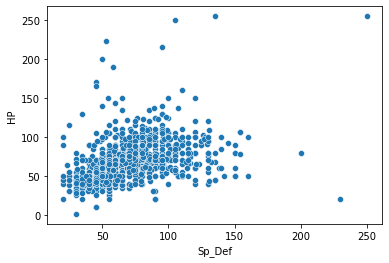

In [5]:
sns.scatterplot(data = df, x=df['Sp_Def'], y=df['HP']) #Using special defense we kind of see a slight correlation

In [6]:
df['Type'] = df['Type'].astype('category')   #Updating the type to category
df['Type']

0        Grass Poison
1        Grass Poison
2        Grass Poison
3        Grass Poison
4               Fire 
            ...      
1040             Ice 
1041           Ghost 
1042    Psychic Grass
1043      Psychic Ice
1044    Psychic Ghost
Name: Type, Length: 1045, dtype: category
Categories (192, object): ['Bug ', 'Bug Electric', 'Bug Fairy', 'Bug Fighting', ..., 'Water Poison', 'Water Psychic', 'Water Rock', 'Water Steel']

### Lets start doing some model development

#### Simple Linear Regression Model

In [7]:
lm = LinearRegression()
lm
X = df[['Sp_Def']]           #Using Sp_Def as the predictor in this example
Y = df['HP']                 # Target Variable
lm.fit(X,Y)                  #Fitting the linear model
Yhat=lm.predict(X)
Yhat[0:5]                    #this is showing us predictions using the first 5 Sp_Def values of the dataframe

array([67.34434273, 72.94923018, 80.42241344, 87.8955967 , 61.73945529])

In [8]:
print('Value of the intercept: ' + str(lm.intercept_))
print('Value of the slope: ' + str(lm.coef_))

Value of the intercept: 43.05649713996293
Value of the slope: [0.37365916]


#### This model uses the equation Yhat = a + bX

#### For future predictions we will uses the equation:   HP = 43 + (.374 * Sp_Def)

## Now we do some multiple linear regression

In [9]:
Z = df[['Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]

In [10]:
lm.fit(Z, df['HP'])    #fitting the model

LinearRegression()

In [11]:
print('Value of the intercept: ' + str(lm.intercept_))
print('Value of the slope: ' + str(lm.coef_))

Value of the intercept: 26.262354369746724
Value of the slope: [ 0.3014334  -0.03448852  0.11724367  0.2465364  -0.06188453]


#### Our Multiple Linear Equation will be:    HP = 26 + (Attack * 0.3) - (Defense * 0.03) + (Sp_Atk * 0.12) + (Sp_Def * 0.24) - (Speed * 0.06) 

In [12]:
Yhat = lm.predict(Z)
Yhat[0:5]              #Testing the first 5 values

array([60.20355361, 68.1677815 , 79.54458972, 91.10093876, 55.79283001])

## Using Visualization

(0.0, 267.7)

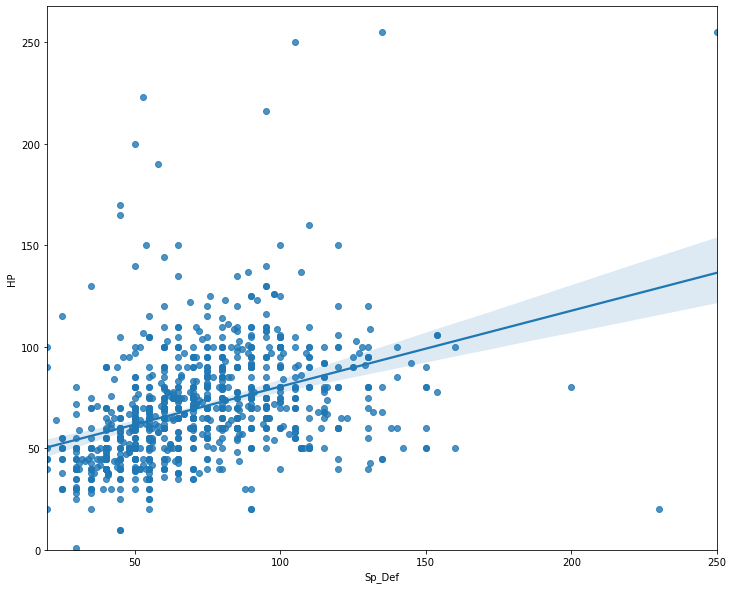

In [13]:
#Simple Linear Regression
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Sp_Def", y="HP", data=df)
plt.ylim(0,)

C:\Users\charg\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\charg\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


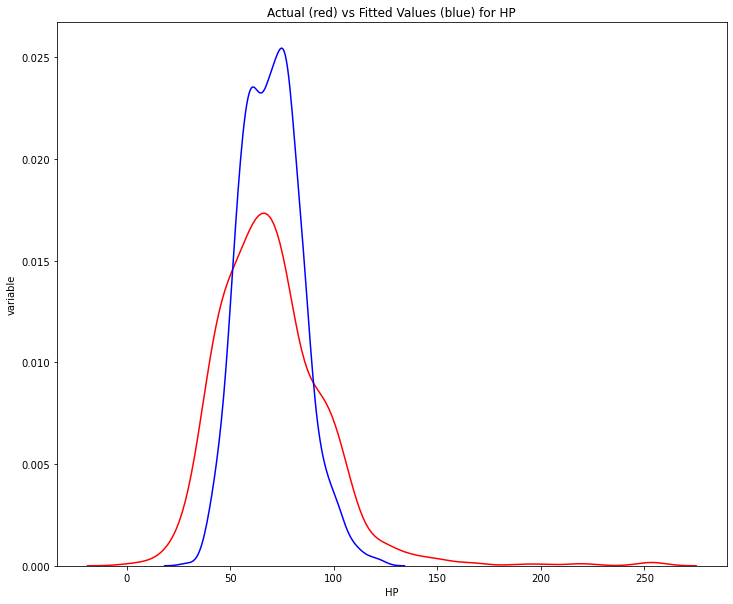

In [14]:
Y_hat = lm.predict(Z)
#Multiple Linear Regression
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['HP'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual (red) vs Fitted Values (blue) for HP')
plt.xlabel('HP')
plt.ylabel('variable')

plt.show()
plt.close()

#### We can see above the accuracy our MLR has. Quite a bit of room for improvement. 

## Polynomial Regression

In [37]:
#We will use the following function to plot the data:

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(20, 175, 20)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for HP')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('HP')

    plt.show()
    plt.close()

In [34]:
x = df['Attack']
y = df['HP']

In [35]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

            3           2
-5.439e-05 x + 0.01409 x - 0.6893 x + 62.49


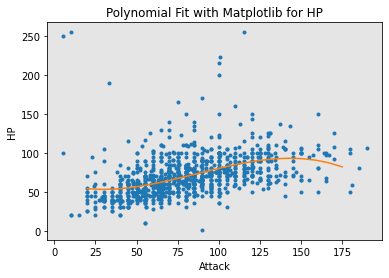

In [38]:
PlotPolly(p, x, y, 'Attack')

In [39]:
np.polyfit(x, y, 3)              #From the chart here i dont see where 1 variable will be a good determinant for HP

array([-5.43914219e-05,  1.40948405e-02, -6.89285078e-01,  6.24942081e+01])